# 导入第三方库

In [3]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from random import *
from math import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from collections import Counter
from itertools import cycle
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
# import tensorflow as tf
import matplotlib as mpl
import seaborn as sns

# 数据输入和准备

In [4]:
df=pd.read_csv("sintax_rdp.fixed.txt",sep="\t")
sample = df[["OTUID","label3"]]
sample
import re
alldata = pd.DataFrame() 
for i in range(len(np.array(sample)[:,1])):
    result = re.split(",|:", np.array(sample)[:,1][i])
    result = [i.replace('"', '') for i in result]
    alldata = pd.DataFrame(pd.concat([alldata,np.transpose(pd.DataFrame(result))],axis=0))
alldata.index = sample["OTUID"]
alldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
OTUID,,,,,,,,,,,,,,
Otu1,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Prevotellaceae,g,Prevotella,s,Prevotella_copri
Otu3,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Bacteroidaceae,g,Bacteroides,s,Bacteroides_plebeius
Otu2,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Bacteroidaceae,g,Bacteroides,NaN,NaN
Otu4,d,Bacteria,p,Firmicutes,c,Clostridia,o,Clostridiales,f,Ruminococcaceae,g,Faecalibacterium,s,Faecalibacterium_prausnitzii
Otu5,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Prevotellaceae,g,Prevotella,s,Prevotella_copri


In [5]:
all_sample = alldata.iloc[:,np.arange(1,14,2)]
all_sample.columns = ["Kingdom","Phylum","Class","Order","Family","Genus","Species"]
all_sample.head()
# all_sample.to_csv("all_data_wuzhongxinxi.csv",index=1)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTUID,,,,,,,
Otu1,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_copri
Otu3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_plebeius
Otu2,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
Otu4,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,Faecalibacterium_prausnitzii
Otu5,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_copri


In [6]:
otu_label = pd.read_csv("otu_label_all0316.csv",header=0,index_col=0)
otu_label
label = otu_label["label"]
otu = otu_label.drop(["label"],axis=1)

In [34]:
Counter(label)
# otu

Counter({'CRC': 200, 'NAA': 197, 'HI': 195, 'AA': 195, 'PL': 200})

In [8]:
map_otu = np.transpose(otu)
result_otu = pd.concat([all_sample["Genus"],map_otu],axis=1)
result_otu

,Genus,CR001,CR002,CR003,CR004,CR005,CR006,CR007,CR008,CR009,...,XRJ06,XRJ07,XRJ08,XRJ09,XRJ10,XRK01,XRK02,XRK03,XRK04,XRK05
Otu1,Prevotella,0.428436,0.687183,10.696363,1.146325,0.374700,0.378136,1.446560,1.499034,1.243503,...,2.619043,4.488453,4.915329,5.328752,7.756694,11.131872,17.430290,0.218494,10.627782,0.968851
Otu3,Bacteroides,2.478040,2.294165,9.779278,0.824155,0.355847,0.742686,0.821966,1.449939,0.944771,...,1.170665,2.480292,4.767341,1.741394,0.796964,0.340727,1.010079,0.657542,0.002051,0.985519
Otu2,Bacteroides,5.255339,11.829357,4.867433,3.435229,5.688834,6.790599,17.785939,6.179426,7.631029,...,11.296490,12.516824,11.001882,13.551292,5.135990,3.941439,0.545700,19.314012,1.927849,2.910720
Otu4,Faecalibacterium,0.671719,5.740749,3.250877,2.581104,3.117783,3.919482,3.800030,1.701961,5.314033,...,1.719681,1.709073,1.524281,1.455430,1.650854,2.793959,4.048878,0.152533,0.324043,0.056256
Otu5,Prevotella,1.018343,0.140851,3.082116,0.490747,0.136683,0.122272,0.727027,0.886983,1.352795,...,4.451945,11.305518,8.798968,5.369299,15.760067,0.076938,0.239680,0.076267,18.499149,1.871028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Otu7350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Otu7348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Otu7352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Otu7353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
filter_otu = result_otu[result_otu["CR001"].isnull()==False]
filter_otu = filter_otu.fillna("Unclassify")

In [10]:
filter_otu.columns[filter_otu.dtypes != "object"]
filter_otu.index = list(filter_otu.index+"("+filter_otu["Genus"]+")")
filter_otu
genus = filter_otu.drop(["Genus"],axis=1)
genus

,CR001,CR002,CR003,CR004,CR005,CR006,CR007,CR008,CR009,CR010,...,XRJ06,XRJ07,XRJ08,XRJ09,XRJ10,XRK01,XRK02,XRK03,XRK04,XRK05
Otu1(Prevotella),0.428436,0.687183,10.696363,1.146325,0.374700,0.378136,1.446560,1.499034,1.243503,1.687718,...,2.619043,4.488453,4.915329,5.328752,7.756694,11.131872,17.430290,0.218494,10.627782,0.968851
Otu3(Bacteroides),2.478040,2.294165,9.779278,0.824155,0.355847,0.742686,0.821966,1.449939,0.944771,0.045264,...,1.170665,2.480292,4.767341,1.741394,0.796964,0.340727,1.010079,0.657542,0.002051,0.985519
Otu2(Bacteroides),5.255339,11.829357,4.867433,3.435229,5.688834,6.790599,17.785939,6.179426,7.631029,5.871449,...,11.296490,12.516824,11.001882,13.551292,5.135990,3.941439,0.545700,19.314012,1.927849,2.910720
Otu4(Faecalibacterium),0.671719,5.740749,3.250877,2.581104,3.117783,3.919482,3.800030,1.701961,5.314033,2.502479,...,1.719681,1.709073,1.524281,1.455430,1.650854,2.793959,4.048878,0.152533,0.324043,0.056256
Otu5(Prevotella),1.018343,0.140851,3.082116,0.490747,0.136683,0.122272,0.727027,0.886983,1.352795,0.668190,...,4.451945,11.305518,8.798968,5.369299,15.760067,0.076938,0.239680,0.076267,18.499149,1.871028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Otu5563(Bacteroides),0.004306,0.032012,0.004441,0.022477,0.021209,0.006793,0.012492,0.019638,0.007286,0.023710,...,0.012818,0.008545,0.014799,0.008536,0.004217,0.002198,0.000000,0.006184,0.000000,0.004167
Otu5571(Bacteroides),0.002153,0.002134,0.002221,0.000000,0.000000,0.002264,0.000000,0.000000,0.002429,0.000000,...,0.014954,0.012818,0.014799,0.008536,0.008433,0.000000,0.000000,0.002061,0.000000,0.002084
Otu5737(Bacteroides),0.019377,0.008536,0.011103,0.007492,0.002357,0.049814,0.002498,0.006546,0.000000,0.036643,...,0.010681,0.023500,0.033826,0.029877,0.002108,0.000000,0.000000,0.000000,0.002051,0.004167
Otu5767(Bacteroides),0.004306,0.006402,0.000000,0.000000,0.002357,0.002264,0.004997,0.006546,0.004857,0.004311,...,0.002136,0.004273,0.000000,0.008536,0.000000,0.002198,0.000000,0.000000,0.004102,0.004167


In [11]:
genus = np.transpose(genus)
genus.head()

,Otu1(Prevotella),Otu3(Bacteroides),Otu2(Bacteroides),Otu4(Faecalibacterium),Otu5(Prevotella),Otu6(Faecalibacterium),Otu8(Prevotella),Otu7(Escherichia/Shigella),Otu10(Bacteroides),Otu9(Unclassify),...,Otu4579(Bacteroides),Otu4584(Bacteroides),Otu5223(Unclassify),Otu5262(Bacteroides),Otu5428(Bacteroides),Otu5563(Bacteroides),Otu5571(Bacteroides),Otu5737(Bacteroides),Otu5767(Bacteroides),Otu6392(Faecalibacterium)
CR001,0.428436,2.478040,5.255339,0.671719,1.018343,0.992508,0.219600,1.433862,1.003272,0.331554,...,0.012918,0.002153,0.002153,0.002153,0.004306,0.004306,0.002153,0.019377,0.004306,0.004306
CR002,0.687183,2.294165,11.829357,5.740749,0.140851,21.417901,0.000000,2.085023,1.596312,0.256093,...,0.023475,0.006402,0.002134,0.010671,0.010671,0.032012,0.002134,0.008536,0.006402,0.010671
CR003,10.696363,9.779278,4.867433,3.250877,3.082116,3.834880,0.000000,1.574366,1.478883,0.297553,...,0.017764,0.011103,0.000000,0.015544,0.015544,0.004441,0.002221,0.011103,0.000000,0.006662
CR004,1.146325,0.824155,3.435229,2.581104,0.490747,6.080018,0.445793,1.183787,0.869109,1.828126,...,0.014985,0.007492,0.003746,0.007492,0.000000,0.022477,0.000000,0.007492,0.000000,0.003746
CR005,0.374700,0.355847,5.688834,3.117783,0.136683,2.135080,0.028279,2.481501,0.584437,0.985059,...,0.014140,0.002357,0.002357,0.002357,0.000000,0.021209,0.000000,0.002357,0.002357,0.014140


In [12]:
label[label=="CR"] = "CRC"
label[label=="NM"] = "HI"

<ipython-input-12-ac5a3571fcf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="CR"] = "CRC"
<ipython-input-12-ac5a3571fcf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="NM"] = "HI"


In [13]:
result = pd.concat([label,genus],axis=1)
result
# result.to_csv("genusdata_filter0318.csv",index=1)
# result = pd.read_csv("genusdata_filter0318.csv",index_col=0,sep = ",")

,label,Otu1(Prevotella),Otu3(Bacteroides),Otu2(Bacteroides),Otu4(Faecalibacterium),Otu5(Prevotella),Otu6(Faecalibacterium),Otu8(Prevotella),Otu7(Escherichia/Shigella),Otu10(Bacteroides),...,Otu4579(Bacteroides),Otu4584(Bacteroides),Otu5223(Unclassify),Otu5262(Bacteroides),Otu5428(Bacteroides),Otu5563(Bacteroides),Otu5571(Bacteroides),Otu5737(Bacteroides),Otu5767(Bacteroides),Otu6392(Faecalibacterium)
Sample,,,,,,,,,,,,,,,,,,,,,
CR001,CRC,0.428436,2.478040,5.255339,0.671719,1.018343,0.992508,0.219600,1.433862,1.003272,...,0.012918,0.002153,0.002153,0.002153,0.004306,0.004306,0.002153,0.019377,0.004306,0.004306
CR002,CRC,0.687183,2.294165,11.829357,5.740749,0.140851,21.417901,0.000000,2.085023,1.596312,...,0.023475,0.006402,0.002134,0.010671,0.010671,0.032012,0.002134,0.008536,0.006402,0.010671
CR003,CRC,10.696363,9.779278,4.867433,3.250877,3.082116,3.834880,0.000000,1.574366,1.478883,...,0.017764,0.011103,0.000000,0.015544,0.015544,0.004441,0.002221,0.011103,0.000000,0.006662
CR004,CRC,1.146325,0.824155,3.435229,2.581104,0.490747,6.080018,0.445793,1.183787,0.869109,...,0.014985,0.007492,0.003746,0.007492,0.000000,0.022477,0.000000,0.007492,0.000000,0.003746
CR005,CRC,0.374700,0.355847,5.688834,3.117783,0.136683,2.135080,0.028279,2.481501,0.584437,...,0.014140,0.002357,0.002357,0.002357,0.000000,0.021209,0.000000,0.002357,0.002357,0.014140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,PL,11.131872,0.340727,3.941439,2.793959,0.076938,1.760788,0.164868,15.110681,0.316546,...,0.000000,0.002198,0.002198,0.002198,0.006595,0.002198,0.000000,0.000000,0.002198,0.008793
XRK02,PL,17.430290,1.010079,0.545700,4.048878,0.239680,0.201160,18.682189,0.083460,0.036380,...,0.000000,0.008560,0.000000,0.002140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
XRK03,PL,0.218494,0.657542,19.314012,0.152533,0.076267,7.171126,0.105124,1.018263,3.411386,...,0.002061,0.000000,0.002061,0.018551,0.006184,0.006184,0.002061,0.000000,0.000000,0.000000


In [14]:
list_custom = ['CRC', 'AA', "NAA","PL","HI"]

# 设置成“category”数据类型
result['label'] = result['label'].astype('category')
# inplace = True，使 recorder_categories生效
result['label'].cat.reorder_categories(list_custom, inplace=True)
# inplace = True，使 df生效
result.sort_values('label', inplace=True)
result

,label,Otu1(Prevotella),Otu3(Bacteroides),Otu2(Bacteroides),Otu4(Faecalibacterium),Otu5(Prevotella),Otu6(Faecalibacterium),Otu8(Prevotella),Otu7(Escherichia/Shigella),Otu10(Bacteroides),...,Otu4579(Bacteroides),Otu4584(Bacteroides),Otu5223(Unclassify),Otu5262(Bacteroides),Otu5428(Bacteroides),Otu5563(Bacteroides),Otu5571(Bacteroides),Otu5737(Bacteroides),Otu5767(Bacteroides),Otu6392(Faecalibacterium)
Sample,,,,,,,,,,,,,,,,,,,,,
CR001,CRC,0.428436,2.478040,5.255339,0.671719,1.018343,0.992508,0.219600,1.433862,1.003272,...,0.012918,0.002153,0.002153,0.002153,0.004306,0.004306,0.002153,0.019377,0.004306,0.004306
CRC08,CRC,2.035238,1.028132,1.648375,11.399857,0.260712,0.647576,11.509188,0.103023,0.428914,...,0.000000,0.004205,0.039948,0.002103,0.002103,0.004205,0.000000,0.002103,0.000000,0.042050
CRC09,CRC,0.385056,5.836416,4.255089,1.434227,0.517014,1.786835,0.601380,0.253099,0.992926,...,0.006490,0.000000,0.006490,0.010816,0.006490,0.064897,0.006490,0.008653,0.008653,0.004326
CRC10,CRC,33.747739,1.983676,2.118305,2.061509,16.109218,1.030754,0.376541,0.172494,0.660524,...,0.006311,0.039968,0.012621,0.012621,0.018932,0.012621,0.031554,0.018932,0.004207,0.029450
CRD01,CRC,0.048362,0.895748,11.657345,1.108121,0.109340,0.435258,0.031540,1.002986,2.624164,...,0.006308,0.000000,0.004205,0.010513,0.002103,0.018924,0.002103,0.067286,0.002103,0.006308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JKD01,HI,0.398903,4.624782,2.563783,13.872268,2.910745,3.814510,8.661597,0.344885,0.452921,...,0.002078,0.006233,0.018699,0.000000,0.008310,0.002078,0.010388,0.002078,0.018699,0.070639
JKC10,HI,0.460203,0.719590,3.869888,1.918209,0.692396,2.070913,0.466478,0.263571,0.081581,...,0.000000,0.023010,0.054388,0.000000,0.004184,0.010459,0.002092,0.002092,0.000000,0.033469
JKC09,HI,0.447162,17.896882,4.877186,4.916703,1.000395,1.441318,0.207982,0.391007,1.037832,...,0.000000,0.000000,0.018718,0.002080,0.020798,0.004160,0.010399,0.004160,0.002080,0.033277


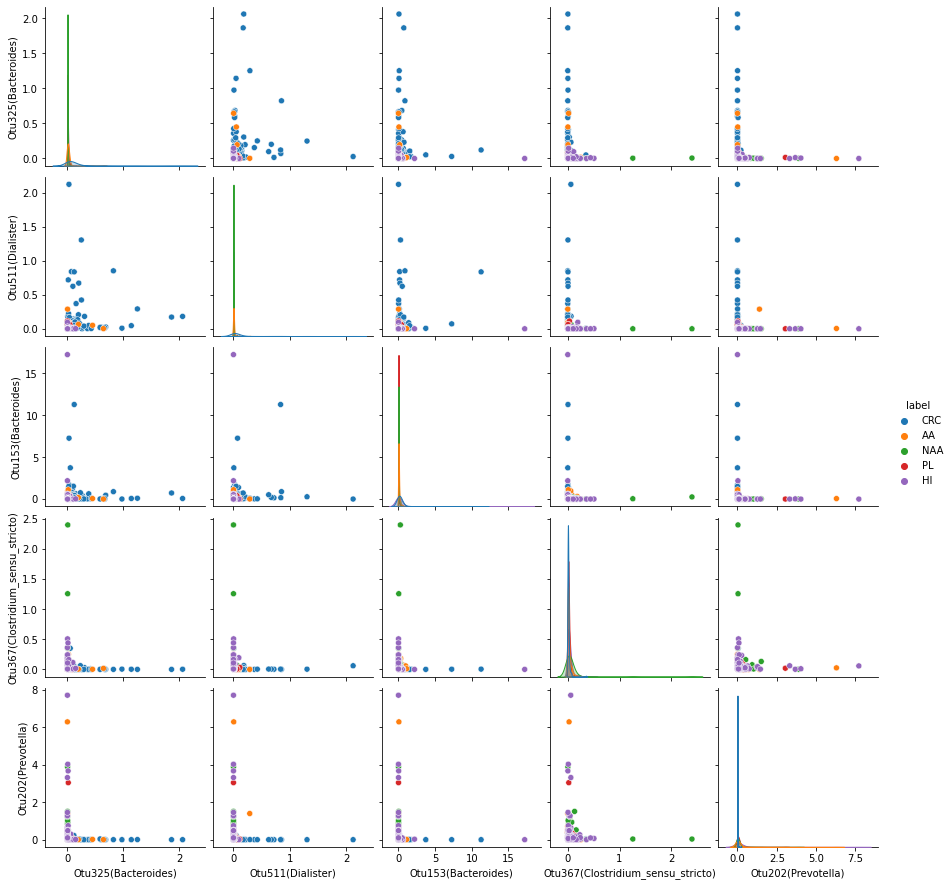

In [20]:
# data = pd.DataFrame(result[["label","Otu325(Bacteroides)","Otu511(Dialister)","Otu153(Bacteroides)","Otu367(Clostridium_sensu_stricto)","Otu202(Prevotella)","Otu186(Clostridium_sensu_stricto)",\
#                             "Otu34(Prevotella)","Otu108(Prevotella)","Otu252(Alistipes)","Otu18(Prevotella)"]])
# data = pd.DataFrame(result[["label","Bacteroides","Prevotella"]])
data = pd.DataFrame(result[["label","Otu325(Bacteroides)","Otu511(Dialister)","Otu153(Bacteroides)","Otu367(Clostridium_sensu_stricto)","Otu202(Prevotella)"]])
sns.pairplot(data,hue="label")
# plt.savefig("5outs-feature_xianguan.pdf",format="pdf")

In [22]:
data.to_csv("box_plot.csv")

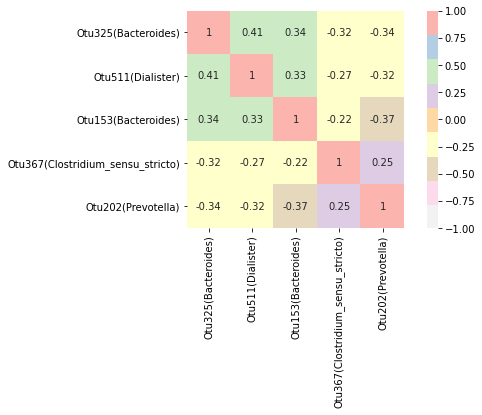

In [37]:
import scipy.stats as ss
font2 = {'family':'Arial',
         'style':'italic',
'weight' : 'normal',
'size'   : 15,
}
#导入相应的模块
plt.figure(figsize=(8,4))
sns.set_context(font_scale=1.5)
#设置字体大小为1.5倍
df = pd.DataFrame(result[["Otu325(Bacteroides)","Otu511(Dialister)","Otu153(Bacteroides)","Otu367(Clostridium_sensu_stricto)","Otu202(Prevotella)"]])
#读入数据
g = sns.heatmap(df.corr("spearman"),vmin=-1,vmax=1,cmap=sns.color_palette('Pastel1_r',n_colors=128),annot=True, square=True)
# df.to_csv("otu-xiangguang.csv")
OTU_xianggaung = df.corr("spearman")
OTU_xianggaung.to_csv("OTU-xiangguang.csv")

#画热力图，图例最小值 -1，最大值1，颜色对象设为红蓝('RdBu'),颜色数目为128
# plt.savefig("otus-xianguan-retu.svg",format="svg")

In [38]:
otu_label = result.drop(["label"],axis=1)
path = pd.read_csv("path_abun_unstrat_descrip.tsv",sep="\t",index_col=0)
description = path["description"]
path = path.drop(["description"],axis=1)
path = np.transpose(path)
path = path[path.index.isin(otu_label.index)]

In [39]:
path.head()
# otu_label

pathway,1CMET2-PWY,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,AEROBACTINSYN-PWY,ALL-CHORISMATE-PWY,ANAEROFRUCAT-PWY,ANAGLYCOLYSIS-PWY,ARG+POLYAMINE-SYN,ARGDEG-PWY,ARGORNPROST-PWY,ARGSYN-PWY,...,TCA-GLYOX-BYPASS,TEICHOICACID-PWY,THISYN-PWY,THREOCAT-PWY,THRESYN-PWY,TRNA-CHARGING-PWY,TRPSYN-PWY,UBISYN-PWY,UDPNAGSYN-PWY,VALSYN-PWY
CR001,32230.2273,694.5569,10.43,4051.1986,29973.1615,38751.2067,8430.2221,1202.0481,1084.9857,21694.2552,...,2697.7151,1461.8689,26525.9490,2241.6937,38795.1897,33011.3041,26074.7815,1587.1356,17049.1555,34117.3310
CR002,34060.9026,68.1146,5.75,1855.1362,26151.6250,40676.4780,7916.7289,680.3925,957.9890,28522.1542,...,1339.9272,1560.9015,29434.1770,679.3949,40212.2150,34989.3640,34912.5693,926.1407,17598.8308,39952.5880
CR003,31421.9230,267.7577,19.02,2063.5692,26279.5557,39001.2257,6512.8718,735.6725,997.8472,22869.8498,...,1680.1613,1872.6372,28893.5757,1007.3668,37381.4994,32514.4587,31610.1179,954.2608,12217.2411,38069.7064
CR004,20396.8249,86.4889,23.51,1397.7013,18108.6011,24845.9695,11033.2417,290.7071,1302.7280,18693.2453,...,614.6341,1089.7304,15702.4294,1075.5901,24070.0388,22521.6072,21289.0397,636.0561,16420.3402,26251.9532
CR005,33178.9310,165.2496,39.84,2912.9505,28802.5438,41708.5750,9005.6567,770.6389,2673.5818,21828.3239,...,1698.9843,2546.4982,26245.8380,971.0502,37029.1409,35948.6019,31786.8243,1394.9044,18233.2662,41505.7641


In [40]:
otu_corr = pd.read_csv("importance-otu.csv")
otu_corr["Genus"][otu_corr["Genus"]=="unassigned"] = "Unclassify"
otu_corr.index = list(otu_corr.OTUId+"("+otu_corr["Genus"]+")")
otu_corr = otu_corr.head(60)
otu_corr

<ipython-input-40-d5cdf00ba11f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otu_corr["Genus"][otu_corr["Genus"]=="unassigned"] = "Unclassify"


,OTUId,importance,Genus
Otu325(Bacteroides),Otu325,0.012742,Bacteroides
Otu511(Dialister),Otu511,0.012560,Dialister
Otu153(Bacteroides),Otu153,0.008817,Bacteroides
Otu367(Clostridium_sensu_stricto),Otu367,0.007053,Clostridium_sensu_stricto
Otu202(Prevotella),Otu202,0.006339,Prevotella
Otu186(Clostridium_sensu_stricto),Otu186,0.006121,Clostridium_sensu_stricto
Otu34(Prevotella),Otu34,0.005536,Prevotella
Otu108(Prevotella),Otu108,0.005380,Prevotella
Otu252(Alistipes),Otu252,0.005213,Alistipes
Otu18(Prevotella),Otu18,0.005056,Prevotella


In [41]:
otu_corr = otu_label[otu_corr.index]
otu_corr

,Otu325(Bacteroides),Otu511(Dialister),Otu153(Bacteroides),Otu367(Clostridium_sensu_stricto),Otu202(Prevotella),Otu186(Clostridium_sensu_stricto),Otu34(Prevotella),Otu108(Prevotella),Otu252(Alistipes),Otu18(Prevotella),...,Otu132(Unclassify),Otu1(Prevotella),Otu6392(Faecalibacterium),Otu17(Bacteroides),Otu263(Unclassify),Otu5(Prevotella),Otu231(Odoribacter),Otu240(Bacteroides),Otu624(Bacteroides),Otu281(Intestinibacter)
Sample,,,,,,,,,,,,,,,,,,,,,
CR001,0.155012,0.370307,0.023682,0.000000,0.000000,0.000000,0.017224,0.002153,0.043059,0.002153,...,0.055977,0.428436,0.004306,0.652342,0.000000,1.018343,0.144247,0.023682,0.008612,0.012918
CRC08,0.088306,0.018923,0.050460,0.002103,0.000000,0.000000,0.046255,0.176612,0.113536,3.334595,...,0.359531,2.035238,0.042050,0.801060,0.025230,0.260712,0.203944,0.002103,0.002103,0.006308
CRC09,0.071387,0.017306,0.242283,0.000000,0.000000,0.000000,0.010816,0.008653,0.043265,0.123305,...,0.343955,0.385056,0.004326,10.299176,0.032449,0.517014,0.164406,0.008653,0.000000,0.000000
CRC10,0.014725,0.006311,0.018932,0.000000,0.000000,0.002104,0.075729,0.010518,0.021036,0.107283,...,0.107283,33.747739,0.029450,1.293702,0.042072,16.109218,0.014725,0.002104,0.000000,0.004207
CRD01,0.025232,0.004205,0.021027,0.000000,0.000000,0.004205,0.016822,0.002103,0.029438,0.000000,...,0.075697,0.048362,0.006308,1.122839,0.082005,0.109340,0.082005,0.000000,0.000000,0.010513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JKD01,0.016621,0.002078,0.004155,0.066484,0.043630,0.043630,0.083105,0.116347,0.043630,0.363583,...,0.164132,0.398903,0.070639,0.498629,0.004155,2.910745,0.010388,0.004155,0.008310,0.043630
JKC10,0.004184,0.000000,0.000000,0.010459,0.148520,0.014643,0.953875,0.087857,0.006275,0.198724,...,0.004184,0.460203,0.033469,0.543876,0.000000,0.692396,0.010459,0.002092,0.035561,0.052296
JKC09,0.006239,0.000000,0.000000,0.010399,0.091512,0.006239,0.216302,0.018718,0.062395,0.031197,...,0.124789,0.447162,0.033277,7.895011,0.000000,1.000395,0.035357,0.000000,0.160146,0.041596


In [42]:
# otu_corr.to_csv("60otus.csv")

In [43]:
max_corr_index = []
max_corr =[]
for j in range(otu_corr.columns.size):
    corr = []
    for i in range(path.columns.size):
        t =np.corrcoef(path.iloc[:,i],otu_corr.iloc[:,j])[0][1]
        corr.append(t)
    max_corr_index.append(corr.index(max(corr, key = abs)))
    max_corr.append(max(corr))

In [44]:
path_corr = pd.DataFrame([path.columns[max_corr_index],max_corr])
path_corr.columns = otu_corr.columns
path_corr.index = ["path","corr_num"]
# path_corr.to_csv("path_corr.csv",index=1)

In [45]:
path_corr

,Otu325(Bacteroides),Otu511(Dialister),Otu153(Bacteroides),Otu367(Clostridium_sensu_stricto),Otu202(Prevotella),Otu186(Clostridium_sensu_stricto),Otu34(Prevotella),Otu108(Prevotella),Otu252(Alistipes),Otu18(Prevotella),...,Otu132(Unclassify),Otu1(Prevotella),Otu6392(Faecalibacterium),Otu17(Bacteroides),Otu263(Unclassify),Otu5(Prevotella),Otu231(Odoribacter),Otu240(Bacteroides),Otu624(Bacteroides),Otu281(Intestinibacter)
path,P341-PWY,PWY-6572,P125-PWY,TCA,PWY-6572,PWY4FS-7,PWY-5005,PWY-5178,PWY-6165,PWY-5178,...,PWY-7332,PWY-5177,METH-ACETATE-PWY,PYRIDOXSYN-PWY,PRPP-PWY,METH-ACETATE-PWY,PWY-6572,PWY-5304,PWY-6263,PWY-7400
corr_num,0.341977,0.13471,0.197093,0.0478639,0.0661495,0.069157,0.150896,0.129504,0.139784,0.194518,...,0.105213,0.0813744,0.0990414,0.145725,0.108537,0.0977253,0.194166,0.133903,0.0518039,0.0898638


In [46]:
description

pathway
1CMET2-PWY                                         N10-formyl-tetrahydrofolate biosynthesis
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY                   4-hydroxyphenylacetate degradation
AEROBACTINSYN-PWY                                                   aerobactin biosynthesis
ALL-CHORISMATE-PWY                                    superpathway of chorismate metabolism
ANAEROFRUCAT-PWY                                                    homolactic fermentation
                                                                ...                        
TRNA-CHARGING-PWY                                                             tRNA charging
TRPSYN-PWY                                                        L-tryptophan biosynthesis
UBISYN-PWY                                superpathway of ubiquinol-8 biosynthesis (prok...
UDPNAGSYN-PWY                                     UDP-N-acetyl-D-glucosamine biosynthesis I
VALSYN-PWY                                                            L-

In [47]:
path_retu = path[list(set(np.transpose(path_corr)["path"]))]

In [48]:
path_retu

pathway,PWY4FS-7,PWY-5304,PWY-7374,P281-PWY,PWY0-845,PWY-6165,PWY-7332,METHGLYUT-PWY,PWY-6263,P221-PWY,...,PWY-6545,PWY-7400,PWY-1541,PWY-5177,PWY-6572,PWY-5178,PWY-6728,PWY-7377,PWY-2941,PWY-7210
CR001,28311.8986,2830.20,206.2526,0.0000,17288.6335,124.1527,13814.1843,596.5521,1583.7695,261.5083,...,9370.4812,21730.9901,7.8650,4581.4389,6098.7429,0.0000,29.8933,15096.6317,18147.4330,805.0367
CR002,26699.2620,3394.85,256.0097,0.5794,13931.8168,191.4718,1821.7886,652.4550,1652.2411,853.5551,...,17147.0823,28668.3898,5.2631,3926.2173,8045.8628,1.2146,37.1476,4633.4867,2082.0008,1502.8471
CR003,25312.7624,1700.30,297.8553,0.0000,13899.9095,189.0954,2609.6199,546.4431,1121.7287,362.5845,...,11515.2414,22983.7251,18.0474,1873.3022,6821.7974,0.0000,29.7793,5429.8756,3664.4668,1242.6410
CR004,17896.5131,1966.00,273.1382,0.0000,6107.0877,168.9211,1506.2569,221.3966,1155.8477,174.1024,...,8270.3039,18853.4198,31.2753,1001.0160,4461.1774,0.0000,85.8744,13186.2811,991.4047,1197.6668
CR005,28896.5627,2382.95,434.1846,2.8480,17657.1403,278.9743,2843.1291,811.2802,1554.2616,610.5662,...,9993.0498,21855.8947,7.8704,2120.3985,5257.8058,5.9806,161.3565,11239.1886,11061.3717,2515.9395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,30496.1792,3056.00,275.0102,2.8262,8462.0008,33.5268,1177.9286,3386.2553,2123.1929,127.1719,...,12522.7983,26639.8655,2.6322,7436.0376,1870.5144,0.8395,14.9563,6234.0564,846.6054,1779.8422
XRK02,17919.6508,289.00,40.4929,0.0000,1524.4871,3.5552,270.9291,48.9823,593.7890,130.8790,...,10858.6737,11769.6908,4.5264,447.5137,355.3027,0.0000,0.0000,7938.8320,11606.5261,345.3613
XRK03,23124.8469,6248.00,73.7233,0.0000,11596.4095,34.5753,6761.4274,312.1753,2178.2140,11.9879,...,9173.4485,23940.8697,2.5708,1201.1438,8141.7186,0.0000,0.0000,3909.5665,1018.2554,922.4727
XRK04,14452.3758,1597.00,223.3878,0.0000,3107.0787,15.6949,1214.3742,223.8899,1922.2120,51.2517,...,4612.1642,11464.7596,2.6420,441.1251,1280.8611,0.0000,0.0000,3548.8940,1537.7555,407.6310


In [49]:
# pipei = pd.concat([np.transpose(path_retu),description],axis=1,join='inner')
# pipei["description"].to_csv("pipei-linshi.csv")

In [50]:
def retumatrix(path_retu,otu_corr):
    retu_matrix = pd.DataFrame(index=path_retu.columns,columns=otu_corr.columns)
    for j in range(otu_corr.columns.size):
        corr = []
        for i in range(path_retu.columns.size):
            t =np.corrcoef(path_retu.iloc[:,i],otu_corr.iloc[:,j])[0][1]
            corr.append(t)
        retu_matrix.iloc[:,j] = corr
    return retu_matrix

In [51]:
label_corr = pd.read_csv("PL-NM",sep="\t",index_col=0)
label_corr = label_corr.index
label_corr
otu_pl = otu_label[label_corr]
otu_pl

label_corr = pd.read_csv("NAA-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_naa = otu_label[label_corr]

label_corr = pd.read_csv("AA-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_aa = otu_label[label_corr]

label_corr = pd.read_csv("CR-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_cr = otu_label[label_corr]

In [52]:
otu_cr = otu_cr.iloc[:,0:20]

In [53]:
otu_cr

,Otu1(Prevotella),Otu106(Clostridium_sensu_stricto),Otu108(Prevotella),Otu120(Fusobacterium),Otu135(Bacteroides),Otu14(Unclassify),Otu153(Bacteroides),Otu163(Unclassify),Otu164(Bacteroides),Otu17(Bacteroides),Otu18(Prevotella),Otu182(Unclassify),Otu186(Clostridium_sensu_stricto),Otu188(Clostridium_XlVb),Otu189(Prevotella),Otu202(Prevotella),Otu227(Clostridium_XlVa),Otu231(Odoribacter),Otu252(Alistipes),Otu281(Intestinibacter)
Sample,,,,,,,,,,,,,,,,,,,,
CR001,0.428436,0.034447,0.002153,1.274544,0.680331,0.131330,0.023682,0.030141,2.450052,0.652342,0.002153,0.023682,0.000000,0.096883,0.000000,0.000000,0.081812,0.144247,0.043059,0.012918
CRC08,2.035238,0.039948,0.176612,0.018923,0.008410,1.776628,0.050460,0.006308,0.004205,0.801060,3.334595,0.052563,0.000000,0.060973,0.000000,0.000000,0.042050,0.203944,0.113536,0.006308
CRC09,0.385056,0.038938,0.008653,0.162243,0.051918,0.341792,0.242283,0.000000,0.095182,10.299176,0.123305,0.220650,0.000000,0.041102,0.000000,0.000000,0.036775,0.164406,0.043265,0.000000
CRC10,33.747739,0.048382,0.010518,0.063107,0.056797,0.351298,0.018932,0.002104,0.021036,1.293702,0.107283,0.058900,0.002104,0.063107,0.000000,0.000000,0.021036,0.014725,0.021036,0.004207
CRD01,0.048362,0.010513,0.002103,0.115648,0.489928,0.414231,0.021027,0.004205,0.134573,1.122839,0.000000,0.067286,0.004205,0.155599,0.000000,0.000000,0.161908,0.082005,0.029438,0.010513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JKD01,0.398903,0.062329,0.116347,0.000000,0.022854,1.153079,0.004155,0.043630,0.000000,0.498629,0.363583,0.078950,0.043630,0.033242,0.000000,0.043630,0.004155,0.010388,0.043630,0.043630
JKC10,0.460203,0.083673,0.087857,0.000000,0.087857,1.129589,0.000000,0.100408,0.002092,0.543876,0.198724,0.002092,0.014643,0.043928,0.903671,0.148520,0.010459,0.010459,0.006275,0.052296
JKC09,0.447162,0.014559,0.018718,0.000000,1.512032,0.507477,0.000000,0.174705,0.006239,7.895011,0.031197,0.008319,0.006239,0.010399,0.035357,0.091512,0.232940,0.035357,0.062395,0.041596


In [54]:
def retu_sort(retu_data):
    retu_data = np.transpose(retu_data)
    retu_data["sum"] = retu_data.sum(axis=1)
    retu_data = retu_data.sort_values(by = ["sum"],ascending=False).drop(["sum"],axis=1)
    return np.transpose(retu_data)

In [55]:
otu_retu_index = list(set(list(otu_pl.columns)+list(otu_naa.columns)+list(otu_aa.columns)+list(otu_cr.columns)))
otu_retu_index
otu_retu = result[["label"]+otu_retu_index]
otu_retu

,label,Otu197(Prevotella),Otu182(Unclassify),Otu5(Prevotella),Otu520(Bacteroides),Otu163(Unclassify),Otu382(Anaerostipes),Otu192(Unclassify),Otu361(Barnesiella),Otu189(Prevotella),...,Otu281(Intestinibacter),Otu164(Bacteroides),Otu298(Bacteroides),Otu25(Roseburia),Otu527(Fusobacterium),Otu153(Bacteroides),Otu188(Clostridium_XlVb),Otu54(Lachnospiracea_incertae_sedis),Otu18(Prevotella),Otu53(Ruminococcus2)
Sample,,,,,,,,,,,,,,,,,,,,,
CR001,CRC,0.176542,0.023682,1.018343,0.245436,0.030141,0.045212,0.000000,0.015071,0.000000,...,0.012918,2.450052,0.092577,0.116259,0.043059,0.023682,0.096883,0.010765,0.002153,0.210989
CRC08,CRC,0.002103,0.052563,0.260712,0.012615,0.006308,0.002103,0.094613,0.050460,0.000000,...,0.006308,0.004205,0.035743,0.319583,0.006308,0.050460,0.060973,0.206047,3.334595,0.435221
CRC09,CRC,0.000000,0.220650,0.517014,0.010816,0.000000,0.002163,0.008653,0.032449,0.000000,...,0.000000,0.095182,0.222814,0.056244,0.105999,0.242283,0.041102,0.445627,0.123305,1.217903
CRC10,CRC,0.000000,0.058900,16.109218,0.004207,0.002104,0.000000,0.002104,0.000000,0.000000,...,0.004207,0.021036,0.046279,0.456477,0.006311,0.018932,0.063107,0.092558,0.107283,0.357609
CRD01,CRC,0.000000,0.067286,0.109340,0.021027,0.004205,0.008411,0.010513,0.000000,0.000000,...,0.010513,0.134573,0.048362,0.325918,0.004205,0.021027,0.155599,0.220783,0.000000,0.161908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JKD01,HI,0.000000,0.078950,2.910745,0.004155,0.043630,0.016621,0.045708,0.004155,0.000000,...,0.043630,0.000000,0.006233,0.671071,0.000000,0.004155,0.033242,0.733400,0.363583,0.126735
JKC10,HI,0.002092,0.002092,0.692396,0.000000,0.100408,0.029286,0.012551,0.008367,0.903671,...,0.052296,0.002092,0.004184,0.464387,0.000000,0.000000,0.043928,0.464387,0.198724,0.244744
JKC09,HI,0.000000,0.008319,1.000395,0.006239,0.174705,0.024958,0.006239,0.012479,0.035357,...,0.041596,0.006239,0.012479,0.174705,0.000000,0.000000,0.010399,0.328612,0.031197,0.083193


In [56]:
path = pd.concat([label,path_retu],axis=1)
path.head()

,label,PWY4FS-7,PWY-5304,PWY-7374,P281-PWY,PWY0-845,PWY-6165,PWY-7332,METHGLYUT-PWY,PWY-6263,...,PWY-6545,PWY-7400,PWY-1541,PWY-5177,PWY-6572,PWY-5178,PWY-6728,PWY-7377,PWY-2941,PWY-7210
Sample,,,,,,,,,,,,,,,,,,,,,
CR001,CRC,28311.8986,2830.20,206.2526,0.0000,17288.6335,124.1527,13814.1843,596.5521,1583.7695,...,9370.4812,21730.9901,7.8650,4581.4389,6098.7429,0.0000,29.8933,15096.6317,18147.4330,805.0367
CR002,CRC,26699.2620,3394.85,256.0097,0.5794,13931.8168,191.4718,1821.7886,652.4550,1652.2411,...,17147.0823,28668.3898,5.2631,3926.2173,8045.8628,1.2146,37.1476,4633.4867,2082.0008,1502.8471
CR003,CRC,25312.7624,1700.30,297.8553,0.0000,13899.9095,189.0954,2609.6199,546.4431,1121.7287,...,11515.2414,22983.7251,18.0474,1873.3022,6821.7974,0.0000,29.7793,5429.8756,3664.4668,1242.6410
CR004,CRC,17896.5131,1966.00,273.1382,0.0000,6107.0877,168.9211,1506.2569,221.3966,1155.8477,...,8270.3039,18853.4198,31.2753,1001.0160,4461.1774,0.0000,85.8744,13186.2811,991.4047,1197.6668
CR005,CRC,28896.5627,2382.95,434.1846,2.8480,17657.1403,278.9743,2843.1291,811.2802,1554.2616,...,9993.0498,21855.8947,7.8704,2120.3985,5257.8058,5.9806,161.3565,11239.1886,11061.3717,2515.9395


In [57]:
path_retu_pl = path[path["label"]=="PL"].drop(["label"],axis=1)
path_retu_naa = path[path["label"]=="NAA"].drop(["label"],axis=1)
path_retu_aa = path[path["label"]=="AA"].drop(["label"],axis=1)
path_retu_cr = path[path["label"]=="CRC"].drop(["label"],axis=1)

In [58]:
otu_pl = otu_retu[otu_retu["label"]=="PL"].drop(["label"],axis=1)
otu_naa =otu_retu[otu_retu["label"]=="NAA"].drop(["label"],axis=1)
otu_aa = otu_retu[otu_retu["label"]=="AA"].drop(["label"],axis=1)
otu_cr = otu_retu[otu_retu["label"]=="CRC"].drop(["label"],axis=1)

In [59]:
retu_pl = retumatrix(path_retu_pl,otu_pl)
retu_naa =retumatrix(path_retu_naa,otu_naa)
retu_aa = retumatrix(path_retu_aa,otu_aa)
retu_cr = retumatrix(path_retu_cr,otu_cr)

In [60]:
retu_pl = retu_sort(retu_pl)
retu_naa = retu_naa[retu_pl.columns]
retu_aa = retu_aa[retu_pl.columns]
retu_cr = retu_cr[retu_pl.columns]

In [61]:
retu_all = pd.concat([retu_pl,retu_naa,retu_aa,retu_cr],axis=1)

In [62]:
retu_all

,Otu299(Parabacteroides),Otu3559(Bacteroides),Otu1(Prevotella),Otu496(Clostridium_XlVa),Otu153(Bacteroides),Otu123(Prevotella),Otu120(Fusobacterium),Otu240(Bacteroides),Otu164(Bacteroides),Otu624(Bacteroides),...,Otu59(Bacteroides),Otu694(Unclassify),Otu163(Unclassify),Otu281(Intestinibacter),Otu65(Unclassify),Otu14(Unclassify),Otu186(Clostridium_sensu_stricto),Otu231(Odoribacter),Otu106(Clostridium_sensu_stricto),Otu87(Romboutsia)
PWY4FS-7,0.099179,0.143954,0.105592,0.170655,0.130427,0.084781,0.036826,0.098857,0.081939,0.112883,...,-0.028189,0.087928,0.113369,0.056284,-0.014127,-0.099555,0.061786,0.032474,0.073008,0.030709
PWY-5304,0.073188,0.069072,0.045730,0.141697,0.078699,0.071293,-0.040556,0.169973,0.106005,0.150917,...,-0.104237,0.035589,0.114675,0.123104,-0.011432,-0.073428,0.165680,0.025523,0.035200,0.027978
PWY-7374,-0.011400,0.108765,-0.074408,-0.062190,-0.012169,-0.022242,0.011097,0.065623,-0.034314,0.043167,...,-0.072280,-0.011791,0.020927,-0.051416,-0.027799,-0.155788,0.068606,-0.067500,-0.069814,-0.049831
P281-PWY,0.386872,0.048948,-0.079560,-0.022772,0.061420,-0.002861,-0.007977,-0.041528,0.007937,-0.033687,...,-0.037351,-0.019476,0.005131,-0.036728,-0.020588,-0.044303,-0.015269,-0.041462,0.007085,-0.065395
PWY0-845,0.038617,-0.033010,0.091973,-0.001459,-0.011016,0.007067,0.107949,-0.052483,0.049133,-0.124395,...,0.074076,-0.037640,0.020263,0.022853,-0.035254,-0.045313,0.015112,0.032163,0.077987,0.045816
PWY-6165,0.205481,0.178999,-0.010177,0.065579,0.041886,-0.022138,0.092756,0.196043,0.045424,-0.010672,...,-0.054552,0.012102,-0.133614,0.002134,-0.082608,0.029134,-0.096524,-0.057632,-0.059133,0.135076
PWY-7332,0.046259,0.056038,0.066195,0.090730,-0.019298,0.056493,0.072326,-0.038857,0.092616,0.043530,...,0.029660,-0.014413,0.047665,0.066499,-0.068230,-0.006399,0.053152,-0.015058,0.025750,0.046606
METHGLYUT-PWY,-0.088582,-0.000840,-0.002431,-0.008226,0.034480,0.073360,0.084569,-0.021001,-0.043714,-0.041441,...,0.153032,-0.027933,-0.102146,0.088404,0.033486,0.007633,0.013653,-0.099730,0.025987,-0.017207
PWY-6263,-0.062267,0.029175,-0.006663,-0.144620,0.011150,0.011741,0.055148,-0.004004,-0.051571,-0.018732,...,-0.049519,-0.007775,-0.077614,-0.072554,-0.059149,-0.090596,-0.024314,-0.087176,-0.118117,-0.089874
P221-PWY,0.102926,0.076979,0.025584,-0.053367,0.001733,-0.021012,-0.008148,0.098141,0.013196,-0.023166,...,0.065029,0.101318,0.145823,-0.004641,0.039764,0.096283,0.072683,-0.032725,0.064299,0.056110


In [63]:
retu_all["sum"] = retu_all.sum(axis=1)
retu_all = retu_all.sort_values(by = ["sum"],ascending=False).drop(["sum"],axis=1)
retu_all

,Otu299(Parabacteroides),Otu3559(Bacteroides),Otu1(Prevotella),Otu496(Clostridium_XlVa),Otu153(Bacteroides),Otu123(Prevotella),Otu120(Fusobacterium),Otu240(Bacteroides),Otu164(Bacteroides),Otu624(Bacteroides),...,Otu59(Bacteroides),Otu694(Unclassify),Otu163(Unclassify),Otu281(Intestinibacter),Otu65(Unclassify),Otu14(Unclassify),Otu186(Clostridium_sensu_stricto),Otu231(Odoribacter),Otu106(Clostridium_sensu_stricto),Otu87(Romboutsia)
CODH-PWY,0.036834,0.044939,-0.000629,0.191793,0.116113,0.068444,-0.005830,-0.067066,0.028926,-0.010378,...,-0.053652,-0.011774,-0.030133,-0.083449,0.000833,0.033563,0.008177,0.007281,-0.004558,0.162995
PWY-2941,0.031906,-0.057962,0.049319,0.091379,0.018024,0.037271,0.087461,-0.093436,0.009645,-0.054542,...,0.058642,-0.046338,0.000183,0.046819,-0.062816,0.073510,-0.069882,-0.012777,-0.036403,0.042176
PWY-181,0.098867,-0.036576,0.045892,-0.004914,-0.044710,-0.045002,-0.026527,-0.023061,0.008309,0.023716,...,-0.093478,-0.049673,0.151435,0.101485,0.102728,-0.008124,0.197651,0.019678,0.031406,0.056587
PWY-1541,0.073521,-0.032219,0.055278,-0.015507,-0.041091,-0.049265,-0.029007,-0.019530,0.002960,0.039466,...,-0.107314,-0.056300,0.108810,0.103478,0.174343,-0.007394,0.173464,-0.003431,0.043611,0.046128
PWY-6545,0.072196,0.038398,0.011694,0.047611,0.045829,0.043937,0.064586,0.010140,0.010537,-0.024806,...,-0.066322,0.018043,-0.023832,0.104362,0.021710,0.016608,0.126932,-0.111155,-0.013110,-0.049936
PWY-5005,0.025913,-0.049358,-0.016653,-0.101463,0.000482,-0.003146,0.031941,-0.066958,0.012519,-0.098139,...,-0.066999,0.047971,-0.115708,0.123793,-0.013651,0.048244,0.151391,-0.129971,0.008723,0.020954
PWY-6572,0.127141,-0.083703,0.103041,-0.063103,-0.045540,-0.087859,0.025369,-0.060282,0.108008,-0.095756,...,0.026919,-0.050465,-0.020263,0.021468,-0.022081,-0.039038,-0.044370,0.045062,0.057551,0.108518
PRPP-PWY,-0.037191,0.124716,0.119775,0.114339,0.153986,0.143154,0.072529,0.012747,-0.014040,0.016241,...,0.023264,-0.058138,-0.023749,-0.022604,-0.030063,-0.050452,0.036280,-0.114959,0.003398,0.030305
PWY-7332,0.046259,0.056038,0.066195,0.090730,-0.019298,0.056493,0.072326,-0.038857,0.092616,0.043530,...,0.029660,-0.014413,0.047665,0.066499,-0.068230,-0.006399,0.053152,-0.015058,0.025750,0.046606
ARGORNPROST-PWY,0.063812,0.225687,0.124111,0.081272,0.079426,0.062071,0.041557,0.129862,-0.012287,0.155814,...,-0.077181,-0.059376,-0.035756,-0.014803,-0.038816,0.032519,-0.030129,-0.013645,-0.039254,-0.087867


In [64]:
# #左侧颜色条
# row_c = dict(zip(pd_iris['class'].unique(), ['green','yellow','pink']))
# sns.clustermap(data=pd_iris,
#                col_colors=pd_iris['class'].map(row_c), #行方向聚类用颜色区分不同类               
#               )

In [65]:
retu_pl.columns

Index(['Otu299(Parabacteroides)', 'Otu3559(Bacteroides)', 'Otu1(Prevotella)',
       'Otu496(Clostridium_XlVa)', 'Otu153(Bacteroides)', 'Otu123(Prevotella)',
       'Otu120(Fusobacterium)', 'Otu240(Bacteroides)', 'Otu164(Bacteroides)',
       'Otu624(Bacteroides)', 'Otu227(Clostridium_XlVa)', 'Otu50(Prevotella)',
       'Otu202(Prevotella)', 'Otu54(Lachnospiracea_incertae_sedis)',
       'Otu172(Unclassify)', 'Otu527(Fusobacterium)', 'Otu182(Unclassify)',
       'Otu189(Prevotella)', 'Otu6392(Faecalibacterium)', 'Otu197(Prevotella)',
       'Otu5(Prevotella)', 'Otu367(Clostridium_sensu_stricto)',
       'Otu29(Prevotella)', 'Otu361(Barnesiella)', 'Otu18(Prevotella)',
       'Otu619(Bacteroides)', 'Otu108(Prevotella)', 'Otu25(Roseburia)',
       'Otu382(Anaerostipes)', 'Otu298(Bacteroides)', 'Otu192(Unclassify)',
       'Otu188(Clostridium_XlVb)', 'Otu252(Alistipes)', 'Otu17(Bacteroides)',
       'Otu135(Bacteroides)', 'Otu520(Bacteroides)', 'Otu53(Ruminococcus2)',
       'Otu59(Bactero

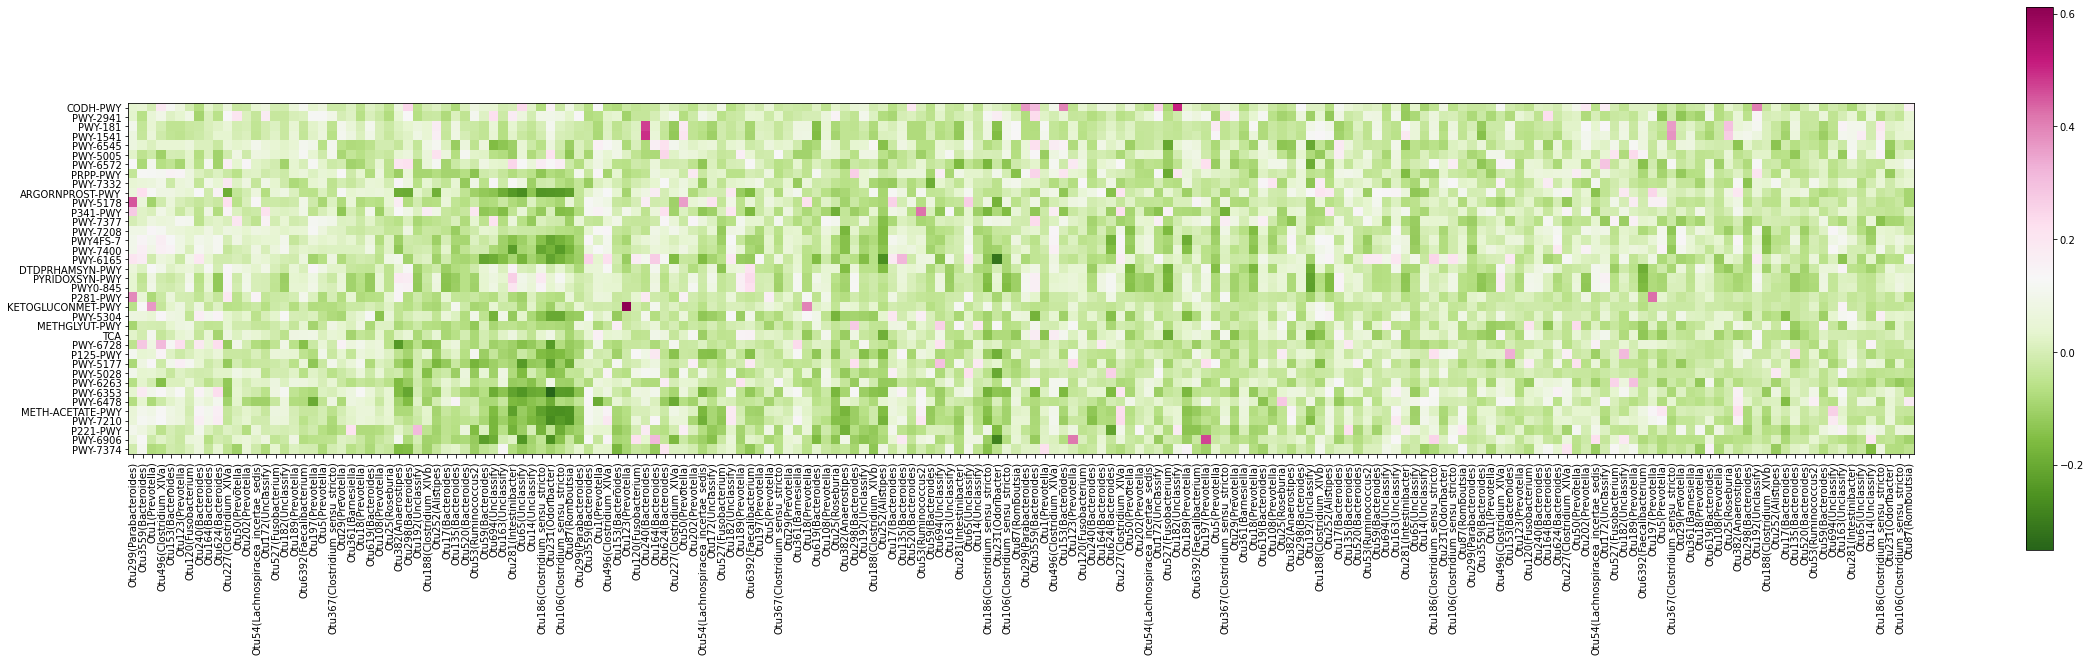

In [67]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(40,10))
    ind_x = cm.columns
    ind_y = cm.index
    x, y = np.meshgrid(len(ind_x),len(ind_y)) 
    plt.imshow(cm, interpolation='nearest',cmap="PiYG_r")
    plt.colorbar()
    xlocations = np.array(range(len(ind_x)))
    ylocations = np.array(range(len(ind_y)))
    plt.xticks(xlocations, ind_x, rotation=90)
    plt.yticks(ylocations, ind_y)
#     plt.tight_layout(rect=[2,4,4,5])
#     plt.savefig("retu-matrix.svg",format="svg")
plot_confusion_matrix(retu_all)
plt.savefig("retu-matrix.svg",format="svg")